# Une mesure de l'inflation liée aux journaux - Projet Python pour la Data-science

### Auteurs : Lise Marchal, Raphaël Pereira et Raphaël Zambélli--Palacio

Ce notebook a pour objectif de présenter les travaux de recherche effectués dans le cadre du cours de Projet Python pour la data-science de la 2A ENSAE.

## Problématique :

Les périodes caractérisées par un taux d'inflation élevé coïcident-elles avec celles de traitement médiatique accru de cette thématique ?


# 1- Statistiques descriptives des mesures d'inflation sur la période

## 1.1- Récupération et nettoyage des données d'inflation de la FED de Saint-Louis

### 1.1.1- Utilisation de l'API de la FRED:

lien documentation pour obtenir les séries d'inflation: https://fred.stlouisfed.org/docs/api/fred/series_observations.html

In [1]:
# Création de l'URL permettant d'accéder à la série:  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

api_root="https://api.stlouisfed.org/fred/series/observations"
series_id="CPIAUCNS"
api_key="69c5f0ad2e33d8dac6297c8b3f25bb1f"
file_type="json"

url_api = (
    f"{api_root}?"
    + f"series_id={series_id}&"
    + f"api_key={api_key}&"
    + f"file_type={file_type}"
)

In [2]:
#Requête

import requests

req = requests.get(url_api)
wb = req.json()

In [3]:
#Première exploration des données
for observation in wb["observations"]:
    print(f"Date: {observation['date']}, Valeur: {observation['value']}")

Date: 1913-01-01, Valeur: 9.800
Date: 1913-02-01, Valeur: 9.800
Date: 1913-03-01, Valeur: 9.800
Date: 1913-04-01, Valeur: 9.800
Date: 1913-05-01, Valeur: 9.700
Date: 1913-06-01, Valeur: 9.800
Date: 1913-07-01, Valeur: 9.900
Date: 1913-08-01, Valeur: 9.900
Date: 1913-09-01, Valeur: 10.000
Date: 1913-10-01, Valeur: 10.000
Date: 1913-11-01, Valeur: 10.100
Date: 1913-12-01, Valeur: 10.000
Date: 1914-01-01, Valeur: 10.000
Date: 1914-02-01, Valeur: 9.900
Date: 1914-03-01, Valeur: 9.900
Date: 1914-04-01, Valeur: 9.800
Date: 1914-05-01, Valeur: 9.900
Date: 1914-06-01, Valeur: 9.900
Date: 1914-07-01, Valeur: 10.000
Date: 1914-08-01, Valeur: 10.200
Date: 1914-09-01, Valeur: 10.200
Date: 1914-10-01, Valeur: 10.100
Date: 1914-11-01, Valeur: 10.200
Date: 1914-12-01, Valeur: 10.100
Date: 1915-01-01, Valeur: 10.100
Date: 1915-02-01, Valeur: 10.000
Date: 1915-03-01, Valeur: 9.900
Date: 1915-04-01, Valeur: 10.000
Date: 1915-05-01, Valeur: 10.100
Date: 1915-06-01, Valeur: 10.100
Date: 1915-07-01, Valeur

In [4]:
#données imbriquées?
print(req.content[:1000])
# je dirais que oui, metadata


b'{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","observation_start":"1600-01-01","observation_end":"9999-12-31","units":"lin","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":1342,"offset":0,"limit":100000,"observations":[{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-01-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-02-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-03-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-04-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-05-01","value":"9.700"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-06-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-07-01","value":"9.900"},{"realtime_start":"2024-11-13","realtime_end":"202

### 1.1.2- Nettoyage des données

#### Création et première exploration du dataframe

In [5]:
# Import des bibliothèques utiles: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Création d'un dataframe à partir du fichier json

CPI_Urban=pd.json_normalize(wb["observations"]) #nested data?

In [7]:
CPI_Urban.head()

,realtime_start,realtime_end,date,value
0,2024-11-13,2024-11-13,1913-01-01,9.800
1,2024-11-13,2024-11-13,1913-02-01,9.800
2,2024-11-13,2024-11-13,1913-03-01,9.800
3,2024-11-13,2024-11-13,1913-04-01,9.800
4,2024-11-13,2024-11-13,1913-05-01,9.700


In [8]:
# On ne garde que les deux dernières colonnes
CPI_Urban = CPI_Urban[["date", "value"]]
CPI_Urban.head()


,date,value
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700


In [9]:
# Infos générales
CPI_Urban.axes

[RangeIndex(start=0, stop=1342, step=1),
 Index(['date', 'value'], dtype='object')]

In [10]:
# Infos générales: types
CPI_Urban.dtypes

date     object
value    object
dtype: object

#### Traitement des values

In [11]:
CPI_Urban["value"] = CPI_Urban["value"].astype(float)

#### Traitement des dates

In [12]:
CPI_Urban['date'] = pd.to_datetime(CPI_Urban['date'])
CPI_Urban['year'] = CPI_Urban['date'].dt.year
CPI_Urban['month'] = CPI_Urban['date'].dt.month

CPI_Urban.head(15)

,date,value,year,month
0,1913-01-01,9.8,1913,1
1,1913-02-01,9.8,1913,2
2,1913-03-01,9.8,1913,3
3,1913-04-01,9.8,1913,4
4,1913-05-01,9.7,1913,5
5,1913-06-01,9.8,1913,6
6,1913-07-01,9.9,1913,7
7,1913-08-01,9.9,1913,8
8,1913-09-01,10.0,1913,9
9,1913-10-01,10.0,1913,10


#### Création de la variable pourcentage d'inflation annuelle: 

Le jeu de données se présente en effet sous la forme d'indices avec une base 100 en 1983. 
Limite: Il n'est pas idéal d'avoir la date de la base postérieure à la période étudiée.  

In [13]:
index_14=CPI_Urban.index[CPI_Urban['date'] == '1914-01-01'][0]
index_end=CPI_Urban.index[CPI_Urban['date'] == '1963-01-01'][0]

print(index_14, index_end)


12 600


In [14]:
#On ne calcule le taux d'inflation annuel que pour la période considérée
CPI_Urban['inf_an']=0

for i in range(index_14,index_end+1):
    b=CPI_Urban.loc[i,'value']
    a=CPI_Urban.loc[i-12,'value']
    CPI_Urban.at[i, 'inf_an']=((b-a)/a)*100

  
CPI_Urban.head(20)

C:\Users\lisem\AppData\Local\Temp\ipykernel_4792\3993219406.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0408163265306047' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  CPI_Urban.at[i, 'inf_an']=((b-a)/a)*100


,date,value,year,month,inf_an
0,1913-01-01,9.8,1913,1,0.000000
1,1913-02-01,9.8,1913,2,0.000000
2,1913-03-01,9.8,1913,3,0.000000
3,1913-04-01,9.8,1913,4,0.000000
4,1913-05-01,9.7,1913,5,0.000000
5,1913-06-01,9.8,1913,6,0.000000
6,1913-07-01,9.9,1913,7,0.000000
7,1913-08-01,9.9,1913,8,0.000000
8,1913-09-01,10.0,1913,9,0.000000
9,1913-10-01,10.0,1913,10,0.000000


#### Création d'un sous-tableau de la période considérée

In [15]:
CPI_sub = CPI_Urban[(CPI_Urban['year'] > 1913) & (CPI_Urban['year'] < 1963)]
CPI_sub.head(10)
CPI_sub.tail(10)

,date,value,year,month,inf_an
590,1962-03-01,30.1,1962,3,1.006711
591,1962-04-01,30.2,1962,4,1.342282
592,1962-05-01,30.2,1962,5,1.342282
593,1962-06-01,30.2,1962,6,1.342282
594,1962-07-01,30.3,1962,7,1.000000
595,1962-08-01,30.3,1962,8,1.337793
596,1962-09-01,30.4,1962,9,1.333333
597,1962-10-01,30.4,1962,10,1.333333
598,1962-11-01,30.4,1962,11,1.333333
599,1962-12-01,30.4,1962,12,1.333333


## 1.2- Traitement des données

### 1.2.1- Premières statistiques descriptives sur l'inflation pendant la période

In [16]:
CPI_sub['inf_an'].describe()

count    588.000000
mean       2.517532
std        6.607607
min      -15.789474
25%       -0.578035
50%        1.449275
75%        3.764927
max       23.668639
Name: inf_an, dtype: float64

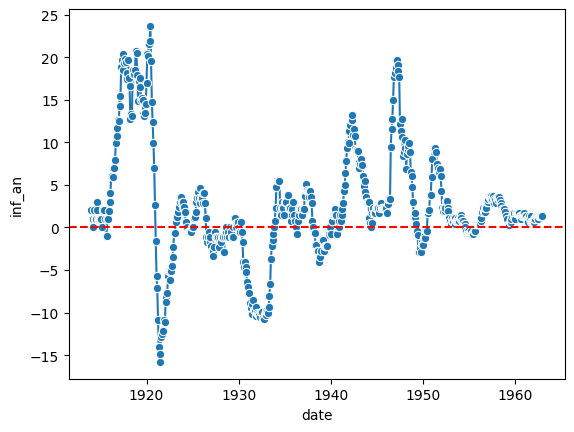

In [17]:
import seaborn as sns
sns.lineplot(x=CPI_sub["date"],y=CPI_sub["inf_an"], marker='o')
plt.axhline(y=0, color='r', linestyle='--', label='Ligne à y=25')

In [18]:
import plotly
import plotly.express as px
import plotly.io as pio

In [19]:
#from plotly.offline import init_notebook_mode
#init_notebook_mode(connected=True)

In [27]:
# Création du graphique (informations en passant la souris)
graph = px.line(CPI_sub, x="date", y="inf_an", title="Pourcentage d'inflation annuelle de 1914 à 1962")

# Légende et format des axes
graph.update_xaxes(title="Date", tickformat="%m-%Y")
graph.update_yaxes(title="Inflation (%)")

# Style du graphique
graph.update_layout(template="plotly_dark")

# Commentaires: max, min, moyenne, médiane
max=CPI_sub["inf_an"].max() 
min=CPI_sub["inf_an"].min()
mean=CPI_sub["inf_an"].mean()
median=CPI_sub["inf_an"].median()

date_max=CPI_sub.loc[CPI_sub["inf_an"] == max, "date"].values[0]
date_min=CPI_sub.loc[CPI_sub["inf_an"] == min, "date"].values[0]

# Pour l'instant l'ajout d'anotations fige le côté interactif du graphique
#graph.add_annotation(x=date_max, y=max, text="Maximum", showarrow=True, xref="x", yref="y") 
#graph.add_annotation(x=date_min, y=min, text="Minimum", showarrow=True)

graph.add_hline(y=mean, line_dash="dot", line_color="yellow", annotation_text="Moyenne", annotation_position="top left", annotation_color="yellow")
graph.add_hline(y=median, line_dash="dot", line_color="white", annotation_text="Médiane", annotation_position="bottom right")
graph.add_hline(y=0, line_color="red")

# Afficher le graphique avec zoom possible et barre à outil
graph.show(renderer="browser",config={"scrollZoom": True, "displayModeBar": True}) #pour l'instant je n'ai pas réussi à résoudre le pb pour que ça s'affiche directement dans le notebook

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Annotation: 'color'

Did you mean "bgcolor"?

    Valid properties:
        align
            Sets the horizontal alignment of the `text` within the
            box. Has an effect only if `text` spans two or more
            lines (i.e. `text` contains one or more <br> HTML tags)
            or if an explicit width is set to override the text
            width.
        arrowcolor
            Sets the color of the annotation arrow.
        arrowhead
            Sets the end annotation arrow head style.
        arrowside
            Sets the annotation arrow head position.
        arrowsize
            Sets the size of the end annotation arrow head,
            relative to `arrowwidth`. A value of 1 (default) gives
            a head about 3x as wide as the line.
        arrowwidth
            Sets the width (in px) of annotation arrow line.
        ax
            Sets the x component of the arrow tail about the arrow
            head. If `axref` is `pixel`, a positive (negative)
            component corresponds to an arrow pointing from right
            to left (left to right). If `axref` is not `pixel` and
            is exactly the same as `xref`, this is an absolute
            value on that axis, like `x`, specified in the same
            coordinates as `xref`.
        axref
            Indicates in what coordinates the tail of the
            annotation (ax,ay) is specified. If set to a x axis id
            (e.g. "x" or "x2"), the `x` position refers to a x
            coordinate. If set to "paper", the `x` position refers
            to the distance from the left of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            left (right). If set to a x axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the left of the
            domain of that axis: e.g., *x2 domain* refers to the
            domain of the second x  axis and a x position of 0.5
            refers to the point between the left and the right of
            the domain of the second x axis. In order for absolute
            positioning of the arrow to work, "axref" must be
            exactly the same as "xref", otherwise "axref" will
            revert to "pixel" (explained next). For relative
            positioning, "axref" can be set to "pixel", in which
            case the "ax" value is specified in pixels relative to
            "x". Absolute positioning is useful for trendline
            annotations which should continue to indicate the
            correct trend when zoomed. Relative positioning is
            useful for specifying the text offset for an annotated
            point.
        ay
            Sets the y component of the arrow tail about the arrow
            head. If `ayref` is `pixel`, a positive (negative)
            component corresponds to an arrow pointing from bottom
            to top (top to bottom). If `ayref` is not `pixel` and
            is exactly the same as `yref`, this is an absolute
            value on that axis, like `y`, specified in the same
            coordinates as `yref`.
        ayref
            Indicates in what coordinates the tail of the
            annotation (ax,ay) is specified. If set to a y axis id
            (e.g. "y" or "y2"), the `y` position refers to a y
            coordinate. If set to "paper", the `y` position refers
            to the distance from the bottom of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            bottom (top). If set to a y axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the bottom of the
            domain of that axis: e.g., *y2 domain* refers to the
            domain of the second y  axis and a y position of 0.5
            refers to the point between the bottom and the top of
            the domain of the second y axis. In order for absolute
            positioning of the arrow to work, "ayref" must be
            exactly the same as "yref", otherwise "ayref" will
            revert to "pixel" (explained next). For relative
            positioning, "ayref" can be set to "pixel", in which
            case the "ay" value is specified in pixels relative to
            "y". Absolute positioning is useful for trendline
            annotations which should continue to indicate the
            correct trend when zoomed. Relative positioning is
            useful for specifying the text offset for an annotated
            point.
        bgcolor
            Sets the background color of the annotation.
        bordercolor
            Sets the color of the border enclosing the annotation
            `text`.
        borderpad
            Sets the padding (in px) between the `text` and the
            enclosing border.
        borderwidth
            Sets the width (in px) of the border enclosing the
            annotation `text`.
        captureevents
            Determines whether the annotation text box captures
            mouse move and click events, or allows those events to
            pass through to data points in the plot that may be
            behind the annotation. By default `captureevents` is
            False unless `hovertext` is provided. If you use the
            event `plotly_clickannotation` without `hovertext` you
            must explicitly enable `captureevents`.
        clicktoshow
            Makes this annotation respond to clicks on the plot. If
            you click a data point that exactly matches the `x` and
            `y` values of this annotation, and it is hidden
            (visible: false), it will appear. In "onoff" mode, you
            must click the same point again to make it disappear,
            so if you click multiple points, you can show multiple
            annotations. In "onout" mode, a click anywhere else in
            the plot (on another data point or not) will hide this
            annotation. If you need to show/hide this annotation in
            response to different `x` or `y` values, you can set
            `xclick` and/or `yclick`. This is useful for example to
            label the side of a bar. To label markers though,
            `standoff` is preferred over `xclick` and `yclick`.
        font
            Sets the annotation text font.
        height
            Sets an explicit height for the text box. null
            (default) lets the text set the box height. Taller text
            will be clipped.
        hoverlabel
            :class:`plotly.graph_objects.layout.annotation.Hoverlab
            el` instance or dict with compatible properties
        hovertext
            Sets text to appear when hovering over this annotation.
            If omitted or blank, no hover label will appear.
        name
            When used in a template, named items are created in the
            output figure in addition to any items the figure
            already has in this array. You can modify these items
            in the output figure by making your own item with
            `templateitemname` matching this `name` alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). Has no effect outside of a
            template.
        opacity
            Sets the opacity of the annotation (text + arrow).
        showarrow
            Determines whether or not the annotation is drawn with
            an arrow. If True, `text` is placed near the arrow's
            tail. If False, `text` lines up with the `x` and `y`
            provided.
        standoff
            Sets a distance, in pixels, to move the end arrowhead
            away from the position it is pointing at, for example
            to point at the edge of a marker independent of zoom.
            Note that this shortens the arrow from the `ax` / `ay`
            vector, in contrast to `xshift` / `yshift` which moves
            everything by this amount.
        startarrowhead
            Sets the start annotation arrow head style.
        startarrowsize
            Sets the size of the start annotation arrow head,
            relative to `arrowwidth`. A value of 1 (default) gives
            a head about 3x as wide as the line.
        startstandoff
            Sets a distance, in pixels, to move the start arrowhead
            away from the position it is pointing at, for example
            to point at the edge of a marker independent of zoom.
            Note that this shortens the arrow from the `ax` / `ay`
            vector, in contrast to `xshift` / `yshift` which moves
            everything by this amount.
        templateitemname
            Used to refer to a named item in this array in the
            template. Named items from the template will be created
            even without a matching item in the input figure, but
            you can modify one by making an item with
            `templateitemname` matching its `name`, alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). If there is no template or no
            matching item, this item will be hidden unless you
            explicitly show it with `visible: true`.
        text
            Sets the text associated with this annotation. Plotly
            uses a subset of HTML tags to do things like newline
            (<br>), bold (<b></b>), italics (<i></i>), hyperlinks
            (<a href='...'></a>). Tags <em>, <sup>, <sub>, <s>, <u>
            <span> are also supported.
        textangle
            Sets the angle at which the `text` is drawn with
            respect to the horizontal.
        valign
            Sets the vertical alignment of the `text` within the
            box. Has an effect only if an explicit height is set to
            override the text height.
        visible
            Determines whether or not this annotation is visible.
        width
            Sets an explicit width for the text box. null (default)
            lets the text set the box width. Wider text will be
            clipped. There is no automatic wrapping; use <br> to
            start a new line.
        x
            Sets the annotation's x position. If the axis `type` is
            "log", then you must take the log of your desired
            range. If the axis `type` is "date", it should be date
            strings, like date data, though Date objects and unix
            milliseconds will be accepted and converted to strings.
            If the axis `type` is "category", it should be numbers,
            using the scale where each category is assigned a
            serial number from zero in the order it appears.
        xanchor
            Sets the text box's horizontal position anchor This
            anchor binds the `x` position to the "left", "center"
            or "right" of the annotation. For example, if `x` is
            set to 1, `xref` to "paper" and `xanchor` to "right"
            then the right-most portion of the annotation lines up
            with the right-most edge of the plotting area. If
            "auto", the anchor is equivalent to "center" for data-
            referenced annotations or if there is an arrow, whereas
            for paper-referenced with no arrow, the anchor picked
            corresponds to the closest side.
        xclick
            Toggle this annotation when clicking a data point whose
            `x` value is `xclick` rather than the annotation's `x`
            value.
        xref
            Sets the annotation's x coordinate axis. If set to a x
            axis id (e.g. "x" or "x2"), the `x` position refers to
            a x coordinate. If set to "paper", the `x` position
            refers to the distance from the left of the plotting
            area in normalized coordinates where 0 (1) corresponds
            to the left (right). If set to a x axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the left of the
            domain of that axis: e.g., *x2 domain* refers to the
            domain of the second x  axis and a x position of 0.5
            refers to the point between the left and the right of
            the domain of the second x axis.
        xshift
            Shifts the position of the whole annotation and arrow
            to the right (positive) or left (negative) by this many
            pixels.
        y
            Sets the annotation's y position. If the axis `type` is
            "log", then you must take the log of your desired
            range. If the axis `type` is "date", it should be date
            strings, like date data, though Date objects and unix
            milliseconds will be accepted and converted to strings.
            If the axis `type` is "category", it should be numbers,
            using the scale where each category is assigned a
            serial number from zero in the order it appears.
        yanchor
            Sets the text box's vertical position anchor This
            anchor binds the `y` position to the "top", "middle" or
            "bottom" of the annotation. For example, if `y` is set
            to 1, `yref` to "paper" and `yanchor` to "top" then the
            top-most portion of the annotation lines up with the
            top-most edge of the plotting area. If "auto", the
            anchor is equivalent to "middle" for data-referenced
            annotations or if there is an arrow, whereas for paper-
            referenced with no arrow, the anchor picked corresponds
            to the closest side.
        yclick
            Toggle this annotation when clicking a data point whose
            `y` value is `yclick` rather than the annotation's `y`
            value.
        yref
            Sets the annotation's y coordinate axis. If set to a y
            axis id (e.g. "y" or "y2"), the `y` position refers to
            a y coordinate. If set to "paper", the `y` position
            refers to the distance from the bottom of the plotting
            area in normalized coordinates where 0 (1) corresponds
            to the bottom (top). If set to a y axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the bottom of the
            domain of that axis: e.g., *y2 domain* refers to the
            domain of the second y  axis and a y position of 0.5
            refers to the point between the bottom and the top of
            the domain of the second y axis.
        yshift
            Shifts the position of the whole annotation and arrow
            up (positive) or down (negative) by this many pixels.
        
Did you mean "bgcolor"?

Bad property path:
color
^^^^^

### 1.2.2- Identification de périodes d'intérêt

#### Identification des périodes d'inflation négative

In [58]:
# Création d'une indicatrice inf_neg qui prend la valeur 1 si l'inflation est négative et 0 sinon
CPI_sub['inf_neg']=0
CPI_sub.loc[CPI_sub['inf_an'] < 0, 'inf_neg'] = 1
CPI_sub.head(30)

C:\Users\lisem\AppData\Local\Temp\ipykernel_34900\1995190950.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,value,year,month,inf_an,inf_neg
12,1914-01-01,10.0,1914,1,2.040816,0
13,1914-02-01,9.9,1914,2,1.020408,0
14,1914-03-01,9.9,1914,3,1.020408,0
15,1914-04-01,9.8,1914,4,0.000000,0
16,1914-05-01,9.9,1914,5,2.061856,0
17,1914-06-01,9.9,1914,6,1.020408,0
18,1914-07-01,10.0,1914,7,1.010101,0
19,1914-08-01,10.2,1914,8,3.030303,0
20,1914-09-01,10.2,1914,9,2.000000,0
21,1914-10-01,10.1,1914,10,1.000000,0


In [ ]:
"""
graph = px.line(CPI_sub, x="date", y="inf_an", title="Pourcentage d'inflation annuelle de 1914 à 1962",animation_frame="year", animation_group="inf_neg")
# Légende et format des axes
graph.update_xaxes(title="Date", tickformat="%m-%Y",range=[1914-01-1,1963-12-01])
graph.update_yaxes(title="Inflation (%)",range=[-25,25])

# Style du graphique
graph.update_layout(template="plotly_dark")

# Commentaires
graph.add_annotation(x="1920-06-01", text="Maximum d'inflation sur la période", showarrow=True)
graph.show(renderer="browser")
"""

In [54]:
# Premières informations sur les périodes d'inflation négatives: 
CPI_neg=CPI_sub[CPI_sub['inf_neg'] == 1]
CPI_neg['inf_an'].describe()




count    158.000000
mean      -4.149776
std        4.029451
min      -15.789474
25%       -7.680995
50%       -2.228430
75%       -0.980392
max       -0.371747
Name: inf_an, dtype: float64

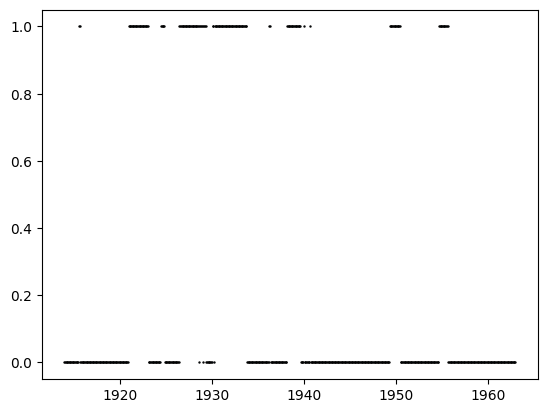

In [ ]:
# Graphique simple pour visualiser les périodes

plt.scatter(CPI_sub["date"], CPI_sub["inf_neg"], s=0.5, edgecolors="black")

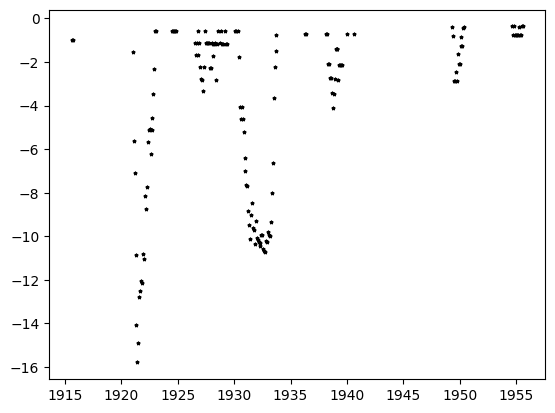

In [77]:
plt.scatter(CPI_neg["date"], CPI_neg["inf_an"], s=5, marker="*",edgecolors="black")

In [ ]:
"""
beg_dates=[CPI_neg.iloc[0]['date']]
beg_dates_double=[[CPI_neg.iloc[0]['date']]]

for i in range(1, len(CPI_neg)): #ne marchait pas avec len+1 et pourtant semble être la vraie boucle
    # Comparer l'index actuel avec l'index précédent
    if (CPI_neg.index[i] - CPI_neg.index[i-1]) != 1: 
        beg_dates.append(CPI_neg.iloc[i]['date'])
        beg_dates.append([CPI_neg.iloc[i]['date']])



for date in beg_dates_double:

## pas fini idée de faire une double liste avec les périodes
"""



[Timestamp('1915-08-01 00:00:00'), Timestamp('1921-01-01 00:00:00'), [Timestamp('1921-01-01 00:00:00')], Timestamp('1924-07-01 00:00:00'), [Timestamp('1924-07-01 00:00:00')], Timestamp('1926-07-01 00:00:00'), [Timestamp('1926-07-01 00:00:00')], Timestamp('1928-10-01 00:00:00'), [Timestamp('1928-10-01 00:00:00')], Timestamp('1929-03-01 00:00:00'), [Timestamp('1929-03-01 00:00:00')], Timestamp('1930-02-01 00:00:00'), [Timestamp('1930-02-01 00:00:00')], Timestamp('1930-05-01 00:00:00'), [Timestamp('1930-05-01 00:00:00')], Timestamp('1936-04-01 00:00:00'), [Timestamp('1936-04-01 00:00:00')], Timestamp('1938-03-01 00:00:00'), [Timestamp('1938-03-01 00:00:00')], Timestamp('1940-01-01 00:00:00'), [Timestamp('1940-01-01 00:00:00')], Timestamp('1940-09-01 00:00:00'), [Timestamp('1940-09-01 00:00:00')], Timestamp('1949-05-01 00:00:00'), [Timestamp('1949-05-01 00:00:00')], Timestamp('1954-09-01 00:00:00'), [Timestamp('1954-09-01 00:00:00')]]
